# Análise descritiva - parte III

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dados = pd.read_csv("sinasc_RO_2019.csv")
dados.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [19]:
categoria = []
for i in range(0,len(dados)):
    if dados.APGAR5[i] <= 3:
        categoria.append('asfixia grave')
    elif dados.APGAR5[i] > 3 and dados.APGAR5[i] <= 5:
        categoria.append('asfixia moderada')
    elif dados.APGAR5[i] > 5 and dados.APGAR5[i] <= 7:
        categoria.append('asfixia leve')
    else:
        categoria.append('normal')
        
dados['cat_apgar5'] = categoria
dados.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,cat_apgar5
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

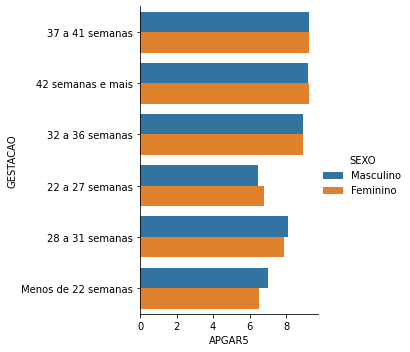

In [42]:
sns.catplot(x='APGAR5', y='GESTACAO',
             hue = 'SEXO',
             kind='bar',
             data=dados,
             ci = None
           )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [30]:
freq = pd.crosstab(dados['APGAR5'], dados['GESTACAO'])
freq

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,7,0,2,5,1,1
1.0,0,0,2,20,0,0
2.0,8,2,2,3,0,1
3.0,6,1,2,5,0,0
4.0,1,5,8,7,0,0
5.0,0,7,11,21,1,0
6.0,2,7,17,45,1,0
7.0,10,11,56,151,5,1
8.0,24,61,362,1417,44,0


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [31]:
freq_pct = freq.div(freq.sum(axis = 1), axis = 0)
freq_pct

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,0.437500,0.000000,0.125000,0.312500,0.062500,0.062500
1.0,0.000000,0.000000,0.090909,0.909091,0.000000,0.000000
2.0,0.500000,0.125000,0.125000,0.187500,0.000000,0.062500
3.0,0.428571,0.071429,0.142857,0.357143,0.000000,0.000000
4.0,0.047619,0.238095,0.380952,0.333333,0.000000,0.000000
5.0,0.000000,0.175000,0.275000,0.525000,0.025000,0.000000
6.0,0.027778,0.097222,0.236111,0.625000,0.013889,0.000000
7.0,0.042735,0.047009,0.239316,0.645299,0.021368,0.004274
8.0,0.012579,0.031971,0.189727,0.742662,0.023061,0.000000


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='APGAR5'>

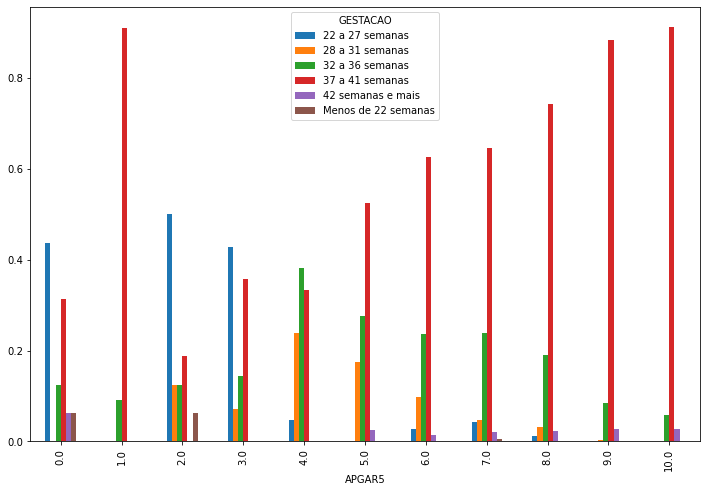

In [47]:
plt.rc('figure', figsize=(12, 8))
freq_pct.plot.bar()

Os bebês com menos semanas de gestação, apresentam tem uma frequência maior de valores baixos de APGAR5. Tal fato indica um maior número de problemas de asfixia, que poderia ser justificado pela prematuridade.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<AxesSubplot:xlabel='APGAR5', ylabel='PESO'>

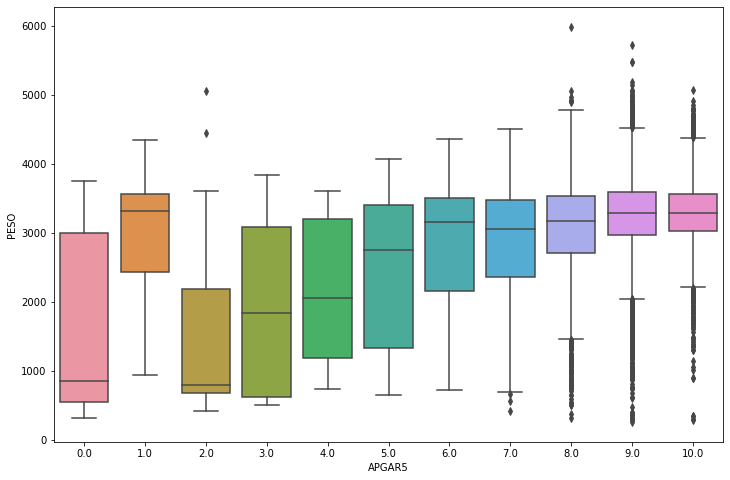

In [49]:
sns.boxplot(data = dados, y="PESO", x="APGAR5", orient="v")

<AxesSubplot:xlabel='APGAR5', ylabel='PESO'>

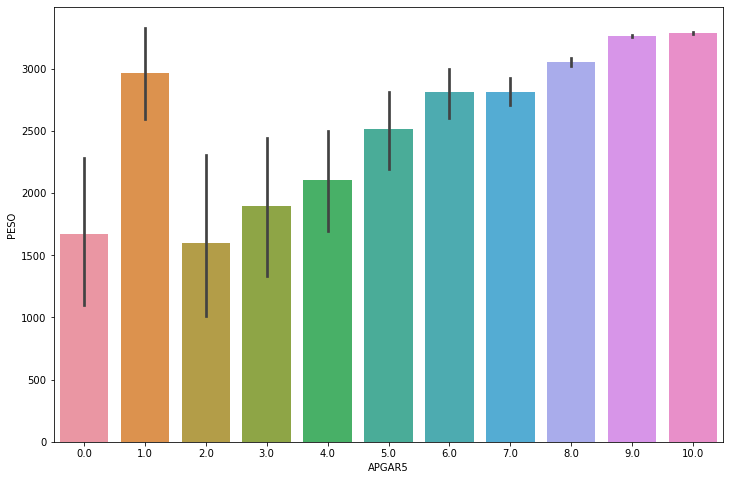

In [59]:
sns.barplot(data=dados, x="APGAR5", y="PESO")

Pelos gráficos, o peso influencia, sim, no valor do APGAR5